**Modelación Multivariada Redes Neuronales**

Maestría en ciencia de datos y analítica

  https://towardsdatascience.com/keras-101-a-simple-and-interpretable-neural-network-model-for-house-pricing-regression-31b1a77f05ae

Con el fin de buscar diferentes alternativas para realizar una predicción lo suficientemente cercana a la realidad sin tener sobreajustes, también exploramos la alternativa de emplear Redes Neuronales.

Las redes neuronales artificiales son un modelo inspirado en el funcionamiento del cerebro humano. Esta formado por un conjunto de nodos conocidos como neuronas artificiales que están conectadas y transmiten señales entre sí. Estas señales se transmiten desde la entrada hasta generar una salida.

Su objetivo es aprender modificándose automáticamente a si mismo de forma que puede llegar a realizar tareas complejas que no podrían ser realizadas mediante programación basada en reglas. Aplicada a la ciencia de datos, las redes neuronales pueden realizar predicciones gracias a su capacidad generalizadora por el hecho de aprender a partir de ejemplos, tal y como lo hace el cerebro humano.

Particularmente para nuestro caso de estudio, queremos realizar una evaluación de las variables que, en principio, consideramos tenian incidencia sobre el indice de precios de la vivienda nueva en la ciudad de Medellín; para posteriormente determinar que variables tienen mayor incidencia y a su vez explican mejor nuestra variable objetivo para predecir valores futuros.

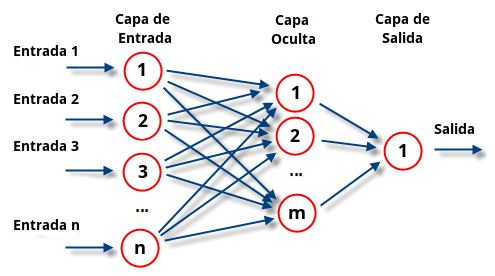

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
#Ruta Diego - DataSet con indices y variaciones incluidas
df = pd.read_excel('/content/drive/My Drive/Data Science/EAFIT/Proyecto Integrador Semestre 2/dataset_vf_deci_coma.xlsx', sheet_name='dataset_vf_dec_coma_xlsx')
#Ruta Diego - DataSet con indices y variaciones incluidas y con ResetIndices
#df = pd.read_excel('/content/drive/My Drive/Data Science/EAFIT/Proyecto Integrador Semestre 2/dataset_vf_deci_coma_ResetIndices.xlsx', sheet_name='dataset_vf_dec_coma_xlsx')
#ruta_su = "/content/drive/MyDrive/MAESTRIA/Semestre2_2020_2/Proyecto Integrador Semestre 2/dataset_vf_deci_coma.xlsx"
#ruta_su="/content/drive/MyDrive/Proyecto Integrador Semestre 2/dataset_vf_deci_coma.xlsx"
#df =  pd.read_excel(ruta_su)

In [3]:
df.head(5)

,ID,Periodo,Año,Trim,d_IPVN_MDE_Num,d_TD_MDE_Porc,d_TO_MDE_Porc,d_PT_MDE_Num_Millon,d_PET_MDE_Num_Millon,d_PEA_MDE_Num_Millon,d_IPC_MDE_Num,d_IPC_NAL_Porc,d_TOSC_NAL_Porc,d_TDSC_NAL_Porc,d_UVAPCSL_Total_NAL_Num,d_PIB_VPCB2015_NAL_Num_Mil_millon,d_PIB_VPCB2015_SC_Num_Mil_Millon,d_TIPPBR_NAL_Porc,d_TIPPST_NAL_Porc,d_OC_MDE_mt2,d_UVAPCSL_Total_ANT_Num,d_UVAPCSL_VIS_ANT_Num,d_UVAPCSL_NoVIS_Ant_Num,d_ALCSD_ANT_VIS_mt2,d_ALCSD_NoVis_ANT_mt2,d_ICCV_NAL_Num,d_ICCV_Mat_NAL_Num,d_ICCV_MO_NAL_Num,d_ICCV_MaqEq_NAL_ Num,d_ICCV_MED_Num,d_IPPTotal_NAL_Num,d_PPPMat_NAL_Num,d_IPVUNom_NAL_Num,d_IPVUReal_NAL_Num,d_AFC_NAL_Millon,d_AFC_NAL_Num,d_CAPVIS_NAL_Millon,d_CAPVIS_NAL_Num,d_PDCG_NAL_ton,d_DDCG_NAL_Ton,...,v_TO_MDE_Porc,v_PT_MDE_Num_Millon,v_PET_MDE_Num_Millon,v_PEA_MDE_Num_Millon,v_IPC_MDE_Num,v_IPC_NAL_Porc,v_TOSC_NAL_Porc,v_TDSC_NAL_Porc,v_UVAPCSL_Total_NAL_Num,v_PIB_VPCB2015_NAL_Num_Mil_millon,v_PIB_VPCB2015_SC_Num_Mil_Millon,v_TIPPBR_NAL_Porc,v_TIPPST_NAL_Porc,v_OC_MDE_mt2,v_UVAPCSL_Total_ANT_Num,v_UVAPCSL_VIS_ANT_Num,v_UVAPCSL_NoVIS_Ant_Num,v_ALCSD_ANT_VIS_mt2,v_ALCSD_NoVis_ANT_mt2,v_ICCV_NAL_Num,v_ICCV_Mat_NAL_Num,v_ICCV_MO_NAL_Num,v_ICCV_MaqEq_NAL_ Num,v_ICCV_MED_Num,v_IPPTotal_NAL_Num,v_PPPMat_NAL_Num,v_IPVUNom_NAL_Num,v_IPVUReal_NAL_Num,v_AFC_NAL_Millon,v_AFC_NAL_Num,v_CAPVIS_NAL_Millon,v_CAPVIS_NAL_Num,v_PDCG_NAL_ton,v_DDCG_NAL_Ton,v_DCG_Ant_Ton,v_UIVIS_MDEVA_Num,v_UINOVIS_MDEVA_Num,v_UIVISNOVIS_MDEVA_Num,v_PIB_VPKB2015_NAL_Num_Mil_millon,v_PIB_VPKB2015_SC_Num_Mil_millon
0,1,2005-01,2005,I,41.72,15.050086,50.983674,3107.255000,2523.905333,1514.751000,56.38,56.38,53.128228,15.762657,5005,81552.57905,3957.231830,15.059797,15.999938,531361,5005,1743,3262,107208,369054,151.103998,158.432142,136.295739,139.725236,150.151740,69.95,79.09,559.153597,65.069588,72286.26327,33795.0,172085.0775,523812.0,2265334.8,1809794.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2005-02,2005,II,42.85,14.461586,50.981004,3119.657667,2537.825000,1512.547333,56.93,56.93,53.853442,14.118871,3841,84065.50848,3480.202153,14.788161,15.873512,375558,3841,428,3413,26051,475051,152.682017,160.270796,137.155970,141.899629,152.496436,70.10,78.86,586.179747,66.776621,75446.86632,36393.0,165783.6239,521813.0,2435894.8,1884160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2005-03,2005,III,44.81,14.811179,50.667551,3131.743000,2551.164000,1517.349333,57.23,57.23,54.805777,13.766963,4569,85285.20488,3281.874986,14.786192,15.626087,482738,4569,1395,3174,83902,346941,152.031442,159.054899,137.297905,143.959471,151.023240,69.83,78.13,592.776847,66.946729,78132.62020,38791.0,172047.2523,518599.0,2577742.5,1998666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2005-04,2005,IV,45.80,10.760881,53.078909,3143.574667,2563.998333,1525.051667,57.25,57.25,56.360210,12.041566,2010,87054.70825,3695.690959,13.585974,14.278268,334698,2010,326,1684,23437,163831,152.329330,159.103506,138.111807,144.580108,151.344183,69.74,77.84,598.823327,67.213431,89254.77084,41498.0,176064.5036,493694.0,2639110.6,2103251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006-01,2006,I,45.94,14.317852,51.264581,3155.263667,2576.532000,1541.567333,58.48,58.48,54.323250,14.047101,3324,90022.40177,4313.072124,13.490436,14.220269,392669,3324,1382,1942,89418,198979,156.322797,162.194933,143.813302,150.575334,155.428257,71.43,79.03,622.556739,69.303316,87415.32324,45243.0,177178.3861,492306.0,2357082.0,1878396.0,...,0.550974,1.545051,2.085128,1.770346,3.724725,3.724725,2.249318,-10.883672,-33.586414,10.38572,8.992152,-10.420866

# Análisis Exploratorio

Para conocer con más de detalle nuestras variables realizamos un analisis exploratorio, inicialmente eliminamos registros que contengan valores nulos. Posteriormente realizamos un diagrama de caja y bigotes para identificar que tantos valores atipicos pueden contener; por último realizamos un grafico de dispersión con tendencias para conocer la distribución de cada una de nuestras variables. 

In [4]:
# dividiendo dataset en indices y variaciones
df_encabezado = df.iloc[:,1:4]
df_indices = df.filter(like='d_', axis=1)
df_variaciones = df.filter(like='v_', axis=1)

In [5]:
df_indices = pd.concat([df_encabezado, df_indices ], axis=1)
df_variaciones = pd.concat([df_encabezado, df_variaciones], axis=1)

In [6]:
df_indices.head()

,Periodo,Año,Trim,d_IPVN_MDE_Num,d_TD_MDE_Porc,d_TO_MDE_Porc,d_PT_MDE_Num_Millon,d_PET_MDE_Num_Millon,d_PEA_MDE_Num_Millon,d_IPC_MDE_Num,d_IPC_NAL_Porc,d_TOSC_NAL_Porc,d_TDSC_NAL_Porc,d_UVAPCSL_Total_NAL_Num,d_PIB_VPCB2015_NAL_Num_Mil_millon,d_PIB_VPCB2015_SC_Num_Mil_Millon,d_TIPPBR_NAL_Porc,d_TIPPST_NAL_Porc,d_OC_MDE_mt2,d_UVAPCSL_Total_ANT_Num,d_UVAPCSL_VIS_ANT_Num,d_UVAPCSL_NoVIS_Ant_Num,d_ALCSD_ANT_VIS_mt2,d_ALCSD_NoVis_ANT_mt2,d_ICCV_NAL_Num,d_ICCV_Mat_NAL_Num,d_ICCV_MO_NAL_Num,d_ICCV_MaqEq_NAL_ Num,d_ICCV_MED_Num,d_IPPTotal_NAL_Num,d_PPPMat_NAL_Num,d_IPVUNom_NAL_Num,d_IPVUReal_NAL_Num,d_AFC_NAL_Millon,d_AFC_NAL_Num,d_CAPVIS_NAL_Millon,d_CAPVIS_NAL_Num,d_PDCG_NAL_ton,d_DDCG_NAL_Ton,d_DCG_Ant_Ton,d_UIVIS_MDEVA_Num,d_UINOVIS_MDEVA_Num,d_UIVISNOVIS_MDEVA_Num,d_PIB_VPKB2015_NAL_Num_Mil_millon,d_PIB_VPKB2015_SC_Num_Mil_millon
0,2005-01,2005,I,41.72,15.050086,50.983674,3107.255000,2523.905333,1514.751000,56.38,56.38,53.128228,15.762657,5005,81552.57905,3957.231830,15.059797,15.999938,531361,5005,1743,3262,107208,369054,151.103998,158.432142,136.295739,139.725236,150.151740,69.95,79.09,559.153597,65.069588,72286.26327,33795.0,172085.0775,523812.0,2265334.8,1809794.0,245999,995,1820,2815,126556.6313,7987.340720
1,2005-02,2005,II,42.85,14.461586,50.981004,3119.657667,2537.825000,1512.547333,56.93,56.93,53.853442,14.118871,3841,84065.50848,3480.202153,14.788161,15.873512,375558,3841,428,3413,26051,475051,152.682017,160.270796,137.155970,141.899629,152.496436,70.10,78.86,586.179747,66.776621,75446.86632,36393.0,165783.6239,521813.0,2435894.8,1884160.0,264458,1130,2775,3905,128568.0800,7191.139268
2,2005-03,2005,III,44.81,14.811179,50.667551,3131.743000,2551.164000,1517.349333,57.23,57.23,54.805777,13.766963,4569,85285.20488,3281.874986,14.786192,15.626087,482738,4569,1395,3174,83902,346941,152.031442,159.054899,137.297905,143.959471,151.023240,69.83,78.13,592.776847,66.946729,78132.62020,38791.0,172047.2523,518599.0,2577742.5,1998666.0,309716,1351,2629,3980,128777.2464,7044.259125
3,2005-04,2005,IV,45.80,10.760881,53.078909,3143.574667,2563.998333,1525.051667,57.25,57.25,56.360210,12.041566,2010,87054.70825,3695.690959,13.585974,14.278268,334698,2010,326,1684,23437,163831,152.329330,159.103506,138.111807,144.580108,151.344183,69.74,77.84,598.823327,67.213431,89254.77084,41498.0,176064.5036,493694.0,2639110.6,2103251.0,299214,1356,2130,3486,130951.0423,7585.260760
4,2006-01,2006,I,45.94,14.317852,51.264581,3155.263667,2576.532000,1541.567333,58.48,58.48,54.323250,14.047101,3324,90022.40177,4313.072124,13.490436,14.220269,392669,3324,1382,1942,89418,198979,156.322797,162.194933,143.813302,150.575334,155.428257,71.43,79.03,622.556739,69.303316,87415.32324,45243.0,177178.3861,492306.0,2357082.0,1878396.0,296812,833,619,1452,134159.0432,8569.558874


In [7]:
df_variaciones.head()

,Periodo,Año,Trim,v_IPVN_MDE_Num,v_TD_MDE_Porc,v_TO_MDE_Porc,v_PT_MDE_Num_Millon,v_PET_MDE_Num_Millon,v_PEA_MDE_Num_Millon,v_IPC_MDE_Num,v_IPC_NAL_Porc,v_TOSC_NAL_Porc,v_TDSC_NAL_Porc,v_UVAPCSL_Total_NAL_Num,v_PIB_VPCB2015_NAL_Num_Mil_millon,v_PIB_VPCB2015_SC_Num_Mil_Millon,v_TIPPBR_NAL_Porc,v_TIPPST_NAL_Porc,v_OC_MDE_mt2,v_UVAPCSL_Total_ANT_Num,v_UVAPCSL_VIS_ANT_Num,v_UVAPCSL_NoVIS_Ant_Num,v_ALCSD_ANT_VIS_mt2,v_ALCSD_NoVis_ANT_mt2,v_ICCV_NAL_Num,v_ICCV_Mat_NAL_Num,v_ICCV_MO_NAL_Num,v_ICCV_MaqEq_NAL_ Num,v_ICCV_MED_Num,v_IPPTotal_NAL_Num,v_PPPMat_NAL_Num,v_IPVUNom_NAL_Num,v_IPVUReal_NAL_Num,v_AFC_NAL_Millon,v_AFC_NAL_Num,v_CAPVIS_NAL_Millon,v_CAPVIS_NAL_Num,v_PDCG_NAL_ton,v_DDCG_NAL_Ton,v_DCG_Ant_Ton,v_UIVIS_MDEVA_Num,v_UINOVIS_MDEVA_Num,v_UIVISNOVIS_MDEVA_Num,v_PIB_VPKB2015_NAL_Num_Mil_millon,v_PIB_VPKB2015_SC_Num_Mil_millon
0,2005-01,2005,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02,2005,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03,2005,III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04,2005,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01,2006,I,10.115053,-4.865315,0.550974,1.545051,2.085128,1.770346,3.724725,3.724725,2.249318,-10.883672,-33.586414,10.38572,8.992152,-10.420866,-11.122974,-26.101276,-33.586414,-20.711417,-40.465972,-16.593911,-46.084042,3.45378,2.375017,5.515625,7.76531,3.514124,2.115797,-0.075863,11.339128,6.506461,20.929371,33.874834,2.959762,-6.014753,4.05005,3.790597,20.655775,-16.281407,-65.989011,-48.419183,6.007123,7.289262


In [ ]:
#df.to_excel("/content/drive/MyDrive/MAESTRIA/Semestre2_2020_2/Proyecto Integrador Semestre 2/dataset_vf_deci_coma.xlsx")

In [ ]:
#df_indices.to_excel("/content/drive/MyDrive/MAESTRIA/Semestre2_2020_2/Proyecto Integrador Semestre 2/dataset_vf_deci_coma_indices.xlsx")
#df_variaciones.to_excel("/content/drive/MyDrive/MAESTRIA/Semestre2_2020_2/Proyecto Integrador Semestre 2/dataset_vf_deci_coma_variaciones.xlsx")

### Trabajemos con índices 

In [ ]:
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Periodo                            61 non-null     object 
 1   Año                                61 non-null     int64  
 2   Trim                               61 non-null     object 
 3   d_IPVN_MDE_Num                     61 non-null     float64
 4   d_TD_MDE_Porc                      61 non-null     float64
 5   d_TO_MDE_Porc                      61 non-null     float64
 6   d_PT_MDE_Num_Millon                61 non-null     float64
 7   d_PET_MDE_Num_Millon               61 non-null     float64
 8   d_PEA_MDE_Num_Millon               61 non-null     float64
 9   d_IPC_MDE_Num                      61 non-null     float64
 10  d_IPC_NAL_Porc                     61 non-null     float64
 11  d_TOSC_NAL_Porc                    61 non-null     float64
 

In [8]:
#Se suprimen variables no numericas
df_indices.drop(['Periodo'], axis=1, inplace=True)
df_indices.drop(['Trim'], axis=1, inplace=True)
df_indices.drop(['Año'], axis=1, inplace=True)

De la modelación de regresión lineal, se detectaron variables que no tenían relación estadística con la variable respuesta, en ese sentido, lo que buscamos con la red, es llegar a una mayor precisión y no solamente con un enfoque lineal
*   Así se gana eficiencia computacional
*   Minimiza la experimentación en la combinatoria de parámetros
*   Hace más comparable los métodos





In [ ]:
# 'd_IPC_MDE_Num','d_PIB_VPCB2015_NAL_Num_Mil_millon',
# 'd_ICCV_MDE_Num', 'd_PDCG_NAL_ton','d_CAPVIS_NAL_Millon',
# 'd_CAPVIS_NAL_Num','v_ICCV_MDE_Num','d_TIPPBR_NAL_Num'


In [9]:
df_indices.columns

Index(['d_IPVN_MDE_Num', 'd_TD_MDE_Porc', 'd_TO_MDE_Porc',
       'd_PT_MDE_Num_Millon', 'd_PET_MDE_Num_Millon', 'd_PEA_MDE_Num_Millon',
       'd_IPC_MDE_Num', 'd_IPC_NAL_Porc', 'd_TOSC_NAL_Porc', 'd_TDSC_NAL_Porc',
       'd_UVAPCSL_Total_NAL_Num', 'd_PIB_VPCB2015_NAL_Num_Mil_millon',
       'd_PIB_VPCB2015_SC_Num_Mil_Millon', 'd_TIPPBR_NAL_Porc',
       'd_TIPPST_NAL_Porc', 'd_OC_MDE_mt2', 'd_UVAPCSL_Total_ANT_Num',
       'd_UVAPCSL_VIS_ANT_Num', 'd_UVAPCSL_NoVIS_Ant_Num',
       'd_ALCSD_ANT_VIS_mt2', 'd_ALCSD_NoVis_ANT_mt2', 'd_ICCV_NAL_Num',
       'd_ICCV_Mat_NAL_Num', 'd_ICCV_MO_NAL_Num', 'd_ICCV_MaqEq_NAL_ Num',
       'd_ICCV_MED_Num', 'd_IPPTotal_NAL_Num', 'd_PPPMat_NAL_Num',
       'd_IPVUNom_NAL_Num', 'd_IPVUReal_NAL_Num', 'd_AFC_NAL_Millon',
       'd_AFC_NAL_Num', 'd_CAPVIS_NAL_Millon', 'd_CAPVIS_NAL_Num',
       'd_PDCG_NAL_ton', 'd_DDCG_NAL_Ton', 'd_DCG_Ant_Ton',
       'd_UIVIS_MDEVA_Num', 'd_UINOVIS_MDEVA_Num', 'd_UIVISNOVIS_MDEVA_Num',
       'd_PIB_VPKB2015_NAL_Nu

In [10]:
v_iccv = df_variaciones.loc[:, 'v_ICCV_MED_Num']
df_indices = pd.concat([df_indices, v_iccv], axis=1)
#df_i_vs = df_indices.loc[:,['d_IPVN_MDE_Num','d_IPC_MDE_Num','d_PDCG_NAL_ton','v_ICCV_MED_Num','d_TIPPBR_NAL_Porc','d_CAPVIS_NAL_Num']]


In [ ]:
df_indices.columns

Index(['d_IPVN_MDE_Num', 'd_TD_MDE_Porc', 'd_TO_MDE_Porc',
       'd_PT_MDE_Num_Millon', 'd_PET_MDE_Num_Millon', 'd_PEA_MDE_Num_Millon',
       'd_IPC_MDE_Num', 'd_IPC_NAL_Porc', 'd_TOSC_NAL_Porc', 'd_TDSC_NAL_Porc',
       'd_UVAPCSL_Total_NAL_Num', 'd_PIB_VPCB2015_NAL_Num_Mil_millon',
       'd_PIB_VPCB2015_SC_Num_Mil_Millon', 'd_TIPPBR_NAL_Porc',
       'd_TIPPST_NAL_Porc', 'd_OC_MDE_mt2', 'd_UVAPCSL_Total_ANT_Num',
       'd_UVAPCSL_VIS_ANT_Num', 'd_UVAPCSL_NoVIS_Ant_Num',
       'd_ALCSD_ANT_VIS_mt2', 'd_ALCSD_NoVis_ANT_mt2', 'd_ICCV_NAL_Num',
       'd_ICCV_Mat_NAL_Num', 'd_ICCV_MO_NAL_Num', 'd_ICCV_MaqEq_NAL_ Num',
       'd_ICCV_MED_Num', 'd_IPPTotal_NAL_Num', 'd_PPPMat_NAL_Num',
       'd_IPVUNom_NAL_Num', 'd_IPVUReal_NAL_Num', 'd_AFC_NAL_Millon',
       'd_AFC_NAL_Num', 'd_CAPVIS_NAL_Millon', 'd_CAPVIS_NAL_Num',
       'd_PDCG_NAL_ton', 'd_DDCG_NAL_Ton', 'd_DCG_Ant_Ton',
       'd_UIVIS_MDEVA_Num', 'd_UINOVIS_MDEVA_Num', 'd_UIVISNOVIS_MDEVA_Num',
       'd_PIB_VPKB2015_NAL_Nu

In [11]:
df_indices = df_indices.reset_index()

In [12]:
df_indices = df_indices.drop('index', axis=1)

In [13]:
df_i_vs = df_indices[['d_IPVN_MDE_Num','d_IPC_MDE_Num','d_PIB_VPCB2015_NAL_Num_Mil_millon', 
                             'd_ICCV_MED_Num', 'd_PDCG_NAL_ton',
                            'd_CAPVIS_NAL_Millon','d_CAPVIS_NAL_Num',
                            'v_ICCV_MED_Num','d_TIPPBR_NAL_Porc']]

In [14]:
df_i_vs.head()

,d_IPVN_MDE_Num,d_IPC_MDE_Num,d_PIB_VPCB2015_NAL_Num_Mil_millon,d_ICCV_MED_Num,d_PDCG_NAL_ton,d_CAPVIS_NAL_Millon,d_CAPVIS_NAL_Num,v_ICCV_MED_Num,d_TIPPBR_NAL_Porc
0,41.72,56.38,81552.57905,150.151740,2265334.8,172085.0775,523812.0,NaN,15.059797
1,42.85,56.93,84065.50848,152.496436,2435894.8,165783.6239,521813.0,NaN,14.788161
2,44.81,57.23,85285.20488,151.023240,2577742.5,172047.2523,518599.0,NaN,14.786192
3,45.80,57.25,87054.70825,151.344183,2639110.6,176064.5036,493694.0,NaN,13.585974
4,45.94,58.48,90022.40177,155.428257,2357082.0,177178.3861,492306.0,3.514124,13.490436


In [ ]:
#Se suprimen los indices siempre y cuando se este trabajando con las variaciones
#df.drop(['d_IPVN_MDE_Num','d_TD_MDE_Porc','d_TO_MDE_Porc','d_PT_MDE_Num_Millon','d_PET_MDE_Num_Millon','d_PEA_MDE_Num_Millon','d_IPC_MDE_Num','d_IPC_NAL_Porc','d_TOSC_NAL_Porc','d_TDSC_NAL_Porc','d_UVAPCSL_Total_NAL_Num','d_PIB_VPCB2015_NAL_Num_Mil_millon','d_PIB_VPCB2015_SC_Num_Mil_Millon','d_TIPPBR_NAL_Porc','d_TIPPST_NAL_Porc','d_OC_MDE_mt2','d_UVAPCSL_Total_ANT_Num','d_UVAPCSL_VIS_ANT_Num','d_UVAPCSL_NoVIS_Ant_Num','d_ALCSD_ANT_VIS_mt2','d_ALCSD_NoVis_ANT_mt2','d_ICCV_NAL_Num','d_ICCV_Mat_NAL_Num','d_ICCV_MO_NAL_Num','d_ICCV_MaqEq_NAL_ Num','d_ICCV_MED_Num','d_IPPTotal_NAL_Num','d_PPPMat_NAL_Num','d_IPVUNom_NAL_Num','d_IPVUReal_NAL_Num','d_AFC_NAL_Millon','d_AFC_NAL_Num','d_CAPVIS_NAL_Millon','d_CAPVIS_NAL_Num','d_PDCG_NAL_ton','d_DDCG_NAL_Ton','d_DCG_Ant_Ton'], axis=1, inplace=True)

In [ ]:
#Se suprimen las variaciones siempre y cuando se este trabajando con los indices
#df.drop(['v_IPVN_MDE_Num','v_TD_MDE_Porc','v_TO_MDE_Porc','v_PT_MDE_Num_Millon','v_PET_MDE_Num_Millon','v_PEA_MDE_Num_Millon','v_IPC_MDE_Num','v_IPC_NAL_Porc','v_TOSC_NAL_Porc','v_TDSC_NAL_Porc','v_UVAPCSL_Total_NAL_Num','v_PIB_VPCB2015_NAL_Num_Mil_millon','v_PIB_VPCB2015_SC_Num_Mil_Millon','v_TIPPBR_NAL_Porc','v_TIPPST_NAL_Porc','v_OC_MDE_mt2','v_UVAPCSL_Total_ANT_Num','v_UVAPCSL_VIS_ANT_Num','v_UVAPCSL_NoVIS_Ant_Num','v_ALCSD_ANT_VIS_mt2','v_ALCSD_NoVis_ANT_mt2','v_ICCV_NAL_Num','v_ICCV_Mat_NAL_Num','v_ICCV_MO_NAL_Num','v_ICCV_MaqEq_NAL_ Num','v_ICCV_MED_Num','v_IPPTotal_NAL_Num','v_PPPMat_NAL_Num','v_IPVUNom_NAL_Num','v_IPVUReal_NAL_Num','v_AFC_NAL_Millon','v_AFC_NAL_Num','v_CAPVIS_NAL_Millon','v_CAPVIS_NAL_Num','v_PDCG_NAL_ton','v_DDCG_NAL_Ton','v_DCG_Ant_Ton'], axis=1, inplace=True)

In [15]:
df_i_vs.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_i_vs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 4 to 60
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   d_IPVN_MDE_Num                     57 non-null     float64
 1   d_IPC_MDE_Num                      57 non-null     float64
 2   d_PIB_VPCB2015_NAL_Num_Mil_millon  57 non-null     float64
 3   d_ICCV_MED_Num                     57 non-null     float64
 4   d_PDCG_NAL_ton                     57 non-null     float64
 5   d_CAPVIS_NAL_Millon                57 non-null     float64
 6   d_CAPVIS_NAL_Num                   57 non-null     float64
 7   v_ICCV_MED_Num                     57 non-null     float64
 8   d_TIPPBR_NAL_Porc                  57 non-null     float64
dtypes: float64(9)
memory usage: 4.5 KB


In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

total_items = len(df_i_vs.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)

fig = make_subplots(rows=total_rows, cols=items_per_row)

cur_row = 1
cur_col = 1

for index, column in enumerate(df_i_vs.columns):
    fig.add_trace(go.Box(y=df_i_vs[column], name=column), row=cur_row, col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=650, width=1000,  showlegend=False)
fig.show()

# Diagramas de dispersión

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np

total_items = len(df_i_vs.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)

fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df_i_vs.columns)

cur_row = 1
cur_col = 1

for index, column in enumerate(df_i_vs.columns):
    fig.add_trace(go.Scattergl(x=df_i_vs[column], 
                            #y=df['v_IPVN_MDE_Num'],  #Para Variaciones
                            y=df_i_vs['d_IPVN_MDE_Num'], #Para indices
                            mode="markers", 
                            marker=dict(size=3)), 
                  row=cur_row, 
                  col=cur_col)
    
    #intercept = np.poly1d(np.polyfit(df[column], df['v_IPVN_MDE_Num'], 1))(np.unique(df[column])) #Para Variaciones
    intercept = np.poly1d(np.polyfit(df_i_vs[column], df_i_vs['d_IPVN_MDE_Num'], 1))(np.unique(df_i_vs[column])) #Para Indices
    
    fig.add_trace(go.Scatter(x=np.unique(df_i_vs[column]), 
                             y=intercept, 
                             line=dict(color='red', width=1)), 
                  row=cur_row, 
                  col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    

fig.update_layout(height=1000, width=850, showlegend=False)
fig.show()

# Preprocesamiento de Datos

In [17]:
from sklearn.model_selection import train_test_split
#Si en el dataset se utilizan Indices
X = df_i_vs.loc[:, df_i_vs.columns != 'd_IPVN_MDE_Num']
y = df_i_vs.loc[:, df_i_vs.columns == 'd_IPVN_MDE_Num']

#Si en el dataset se utilizan variaciones
#X = df.loc[:, df.columns != 'v_IPVN_MDE_Num']
#y = df.loc[:, df.columns == 'v_IPVN_MDE_Num']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

Consideramos para este ejercicio, que nuestra data de entrenamiento sean los primeros trimestres de los años con que contamos información en nuestro DataSet (Desde 2006-01 hasta 2018-01). Como testeo para nuestra predicción, queremos dejar los ultimos 8 trimestres comprendiendo entre el 2018-02 al 2020-01

In [18]:
# Estás lineas son para entregar el entrenamiento los primeros años, y el testeo los últimos dos años

#Para Indices
X_train = X.iloc[0:49,:]
X_test = X.iloc[49:57,:]
y_train = y.iloc[0:49,:]
y_test = y.iloc[49:57,:]

Normalización

In [19]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Construyamos nuestro modelo

Debido a la cantidad de datos presentados en nuestro DataSet, debemos tener cuidado de no crear un modelo demasiado complejo, lo que podría llevar a sobreajustar nuestros datos. Para ello vamos a adoptar una arquitectura basada en dos capas densas, la primera con 1024 y la segunda con 512 neuronas, ambas utilizando una función de activación RELU (Rectified Linear Unit). Se utilizará una capa densa con una activación también RELU como capa de salida.
Para permitirnos saber si nuestro modelo está aprendiendo correctamente, usaremos una función de pérdida de error cuadrático medio y para reportar su desempeño adoptaremos la métrica de Error Porcentual Absoluto Medio (MAPE).
Al utilizar el método de resumen de Keras, podemos ver que tenemos un total de 531.457 parámetros, lo cual es aceptable para nuestro conjunto de datos.

In [ ]:
X_train.shape

(49, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1024, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(512, activation='relu', name='dense_2'))
model.add(Dense(1, activation='relu', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mape'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_output (Dense)         (None, 1)                 513       
Total params: 534,529
Trainable params: 534,529
Non-trainable params: 0
_________________________________________________________________


Entrenamiento del modelo

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

Se realiza un ciclo para entrenar y evaluar el modelo, bien sea con 40 iteraciones o hasta que el MAPE sea inferior a 0,7

In [ ]:
# 1. hasta que el mape sea menor a 1 
# si llega a x repeticiones 

i = 1
mae_nn = 100
while i <= 10 or mae_nn < 1.33:
  history = model.fit(X_train, y_train, epochs=3000, validation_split=0.05, verbose=0)
  mse_nn, mae_nn = model.evaluate(X_test, y_test) 
  print("repeticiones: " + str(i) + " MAPE: " + str(mae_nn))
  i += 1

1/1 [==============================] - 0s 2ms/step - loss: 21.8664 - mape: 2.5701
repeticiones: 1 MAPE: 2.570110321044922
1/1 [==============================] - 0s 2ms/step - loss: 22.8487 - mape: 2.6631
repeticiones: 2 MAPE: 2.6630516052246094
1/1 [==============================] - 0s 2ms/step - loss: 21.9830 - mape: 2.5859
repeticiones: 3 MAPE: 2.5859451293945312
1/1 [==============================] - 0s 2ms/step - loss: 18.9740 - mape: 2.3278
repeticiones: 4 MAPE: 2.3277535438537598
1/1 [==============================] - 0s 2ms/step - loss: 21.8525 - mape: 2.5783
repeticiones: 5 MAPE: 2.578347682952881
1/1 [==============================] - 0s 2ms/step - loss: 22.3046 - mape: 2.6113
repeticiones: 6 MAPE: 2.6112935543060303
1/1 [==============================] - 0s 2ms/step - loss: 22.2360 - mape: 2.6055
repeticiones: 7 MAPE: 2.6054744720458984
1/1 [==============================] - 0s 2ms/step - loss: 20.8559 - mape: 2.4919
repeticiones: 8 MAPE: 2.491861581802368
1/1 [==============

In [ ]:
#model.save('/content/drive/MyDrive/MAESTRIA/Semestre2_2020_2/Proyecto Integrador Semestre 2/modelo/modelo_ANN_MV_2711.h5')
valde = "/content/drive/MyDrive/Data Science/EAFIT/Proyecto Integrador Semestre 2/modelo/modelo_ANN_MV_0212.h5"
dic02 = "/content/drive/MyDrive/Proyecto Integrador Semestre 2/modelo/modelo_ANN_MV_0212.h5"
ruta = valde

In [ ]:
model.save(ruta)

Una vez entrenamos nuestro modelo, evaluamos sus resultados para identificar que tan confiables serán sus predicciones. Como anteriormente se mencionó, esta evaluación se realizará mediante el error cuadratico medio, el cual nos entrega un resultado de 5,25 considerado bastante aceptable. 

La metrica seleccionada fue Error Porcentual Absoluto Medio (MAPE). Es un indicador del desempeño del pronóstico que mide el tamaño del error (absoluto) en términos porcentuales. El modelo nos entrega un MAPE de 1,33 considerado tambien bastante bueno.

En conclusión nuestro modelo se ajusta adecuadamente y con las variables seleccionadas puede predecir acertadamente el indice de precios de la vivienda nueva en la ciudad de Medellín.

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
#print('Mean absolute error on test data: ', mae_nn)
print('Mape: ', mae_nn)

1/1 [==============================] - 0s 2ms/step - loss: 18.7211 - mape: 2.2836
Mean squared error on test data:  18.721059799194336
Mape:  2.283639430999756


In [ ]:
result = model.predict(X_test)

In [ ]:
# RESULTADOS DE LA COMPARACIÓN ENTRE LA PREDICCIÓN Y EL VALOR REAL, DATOS DE TESTEO
df_Result = pd.DataFrame()
#df_Result['Dato Real'] = y_test['v_IPVN_MDE_Num'] #Para variaciones
df_Result['Dato Real'] = y_test['d_IPVN_MDE_Num'] #Para indices
df_Result['Prediccion'] = result
df_Result

,Dato Real,Prediccion
53,137.56,138.319901
54,139.81,142.419022
55,145.35,146.069702
56,146.34,148.767838
57,149.84,154.055344
58,152.22,159.121201
59,154.57,162.817276
60,157.77,159.369537


A continuación realizamos una grafica de la función de pérdida de error cuadratico medio y su comportamiento conforme se va entrenando el modelo en las iteraciones definidas. Como se puede observar el valor disminuye a lo largo del avance en las iteraciones.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
# Arreglo con los siguientes campos (loss,mae,val_loss,val_mae)
#history.history

A continuación realizamos una grafica de la métrica "Error Porcentual Absoluto Medio (MAPE)" y su comportamiento conforme se va entrenando el modelo en las iteraciones definidas. En este caso también se puede observar que el valor disminuye a lo largo del avance en las iteraciones.

In [ ]:
fig = go.Figure()

# Se habilita si se va a pintar el mae (Media Absoluta de error)
fig.add_trace(go.Scattergl(y=history.history['mape'],
                    name='Train'))

# Se habilita si se va a pintar la precisión
#fig.add_trace(go.Scattergl(y=history.history['accuracy'],
#                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mape'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='MAPE')

fig.show()

# Evaluemos el modelo y realicemos la predicción

In [ ]:
# hacer real vs. predicho.

# Comparación con métodos tradicionales

Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  23.929479505588123
Mean absolute error on test data:  4.658018761855459


Arboles de decisión

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  1292.1692250000006
Mean absolute error on test data:  31.32250000000001


# Explicación de nuestro modelo

La siguiente grafica la consideramos bastante relevante, pues si bien las redes neuronales son llamadas cajas negras debido a que no se conoce con certeza  cómo el algoritmo aprende y toma decisiones; si podemos conocer cuales son las variables más relevantes y que tomaron un mayor protagonismo a la hora de realizar el entrenamiento y su posterior predicción.

Esto quiere decir que para la red neuronal el PIB Nacional es la variable que por una considerable ventaja explica el comportamiento de nuestra variable objetivo; el indice de precios de la vivienda nueva en la ciudad de Medellín.

In [ ]:
!pip install shap

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


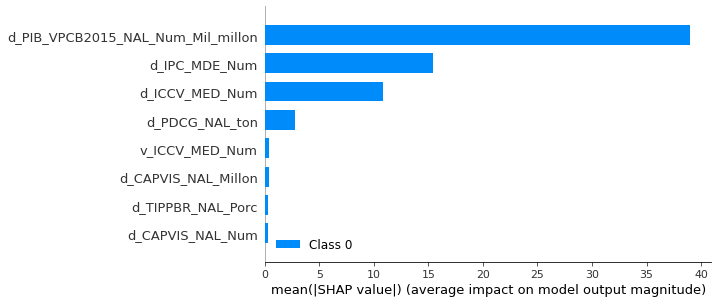

In [ ]:
import shap
shap.initjs()
explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values = explainer.shap_values(X_test[:100].values)
shap.summary_plot(shap_values, X_test, plot_type='bar')

#Lectura de la red neuronal almacenada

In [ ]:
X_test

,d_IPC_MDE_Num,d_PIB_VPCB2015_NAL_Num_Mil_millon,d_ICCV_MED_Num,d_PDCG_NAL_ton,d_CAPVIS_NAL_Millon,d_CAPVIS_NAL_Num,v_ICCV_MED_Num,d_TIPPBR_NAL_Porc
53,2.051920,1.863375,2.230763,0.794724,0.270233,-0.155556,0.343189,-0.196192
54,2.065488,1.994103,2.236699,1.311764,0.203740,-0.177942,0.220651,-0.175871
55,2.130613,2.048843,2.268925,1.587456,-0.012503,-0.219963,-0.011917,-0.465171
56,2.310609,2.161711,2.453377,0.895913,-0.161328,-0.242340,-0.243110,-0.233378
57,2.424577,2.308161,2.495356,1.040560,-0.274742,-0.268906,-0.549192,-0.385877
58,2.471612,2.422117,2.511045,1.888725,-0.308909,-0.279406,-0.508550,-0.412490
59,2.536736,2.528829,2.533095,2.053852,-0.122161,-0.290035,-0.555072,-0.695639
60,2.687789,2.445781,2.842211,0.482295,-0.057287,-0.335261,-0.057483,-0.743833


In [ ]:
y_test

,d_IPVN_MDE_Num
53,137.56
54,139.81
55,145.35
56,146.34
57,149.84
58,152.22
59,154.57
60,157.77


In [20]:
import numpy as np

In [21]:
valde = "/content/drive/MyDrive/Data Science/EAFIT/Proyecto Integrador Semestre 2/modelo/modelo_ANN_MV_0212.h5"
su = "/content/drive/MyDrive/Proyecto Integrador Semestre 2/modelo/modelo_ANN_MV_0212.h5"

In [22]:
ruta = valde

In [23]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
# Recrea exactamente el mismo modelo solo desde el archivo
from tensorflow import keras
from tensorflow.keras import layers
new_model = keras.models.load_model(ruta)

In [25]:
# Se hacen las predicciones
trainPredict = pd.DataFrame(new_model.predict(X_train))
testPredict = pd.DataFrame(new_model.predict(X_test))

In [26]:
trainY=pd.DataFrame(y_train)
testY=pd.DataFrame(y_test)

In [27]:
import numpy as np
mape(testY,testPredict)

2.2836401662328893

In [28]:
res = pd.DataFrame()
res['IPVN_MDE_Predicho'] = testPredict[0]
res['IPVN_MDE_Real'] = np.array(testY['d_IPVN_MDE_Num'])
res['Periodo'] = np.array((df_encabezado.iloc[53:61,0]))
res

,IPVN_MDE_Predicho,IPVN_MDE_Real,Periodo
0,138.319901,137.56,2018-02
1,142.419022,139.81,2018-03
2,146.069702,145.35,2018-04
3,148.767838,146.34,2019-01
4,154.055344,149.84,2019-02
5,159.121201,152.22,2019-03
6,162.817276,154.57,2019-04
7,159.369537,157.77,2020-01


### Grafica de comparación entre el IPVN Predicho y el real con PLOTLY

In [ ]:
!pip install chart_studio

In [31]:
import plotly.graph_objs as go

In [32]:
Real_data = go.Scatter(x=res.Periodo,y=res.IPVN_MDE_Real)

In [33]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [34]:
# Create the steam data object
Predicho_data = go.Scatter(x=res.Periodo,
                        y=res.IPVN_MDE_Predicho,
                        # Specify axis
                        yaxis='y2')

In [35]:
import chart_studio.plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
configure_plotly_browser_state()
init_notebook_mode(connected=False)
layout = go.Layout(height=600, width=800,
                   title='IPVN MDE REAL vs IPVN MDE PREDICHO',
                   # Same x and first y
                   xaxis=dict(title='Trimestre'),
                   yaxis=dict(title='IPVN MDE Predicho', color='red'),
                   # Add a second yaxis to the right of the plot
                   yaxis2=dict(title='IPVN MDE Real', color='blue',
                               overlaying='y', side='right')
                   )
fig = go.Figure(data=[Real_data, Predicho_data], layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.